# Tienda online 'ICE'

La tienda online 'ICE' proporciona los datos históricos de venta de videojuegos obtenidos hasta el 2016.
En el presente proyecto tiene por objetivo identificar:
   - Patrones que determinen si un juego tiene éxito o no

Que a su vez nos ayudará a detectar:
   - Proyectos prometedores 
   - Planificar campañas publicitarias

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math

data_games = pd.read_csv('e:\CARO\Programacion\Tripleten_Data_Scientist\proyecto\games.csv')

data_games.info()
display(data_games)
print(data_games.describe())
print()
print('El número de registros duplicados es de:' , data_games.duplicated().sum() ,'filas')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000  

El número de registros duplicados es de: 0 filas


### Primeras observaciones

    Tenemos un dataset con las siguientes características:
        - Registros     16,715
        - Filas         16,714
        - Columnas          10 
        - Columnas con datos nulos:
            0   Name
            2   Year_of_Release  
            3   Genre            
            8   Critic_Score     
            9   User_Score       
            10  Rating
    
Para tener una mejor comprensión de los datos, se revisan el tipo de datos únicos de las columnas con datos nulos

In [2]:
unique_Name = data_games['Name'].unique()
unique_Year_of_Release = data_games['Year_of_Release'].unique()
unique_Genre = data_games['Genre'].unique()

print('Name')
print(unique_Name)
print()
print('Year_of_Release')
print(unique_Year_of_Release)
print()
print('Genre')
print(unique_Genre)


Name
['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

Year_of_Release
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [3]:
unique_Critic_Score = data_games['Critic_Score'].unique()
unique_User_Score = data_games['User_Score'].unique()
unique_Rating = data_games['Rating'].unique()

print('Critic_Score')
print(unique_Critic_Score)
print()
print('User_Score')
print(unique_User_Score)
print()
print('Rating')
print(unique_Rating)

Critic_Score
[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

User_Score
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

Rating
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Con base a los datos únicos de las columnas con datos ausentes, puedo hacer las siguientes observaciones:
    
    - El nombre de datos únicos en la columna de 'Name' son muchos, y realmente solo tenemos 2 datos ausentes, puesto que son 16713 datos no nulos contra 16715 registros. No se sustituirán esos datos nulos
    - Los datos nulos de 'Genre' solo son 2 y no se sustituirán esos datos nulos, puesto que son mínimos
    - Los datos nulos de 'Critic_Score' no se sustituirán los nulos para no afectar el análisis de los datos, y se mantendrá como float, para que en caso de sacar alguna media o promedio, nos lo pueda dar con detalle. Estos datos pudieran estar ausentes debido a que no se tomaron en cuenta por la comunidad de la crítica, no cumplieron algún parámetro para ser tomados en cuenta, o no se llegaba a un acuerdo
    - Para la columna 'Rating' se revisa sus datos ausentes

In [4]:
nan_data = data_games[['Critic_Score', 'User_Score', 'Rating']]
rating_na = nan_data[nan_data['Rating'].isna()]

print(rating_na)

       Critic_Score User_Score Rating
1               NaN        NaN    NaN
4               NaN        NaN    NaN
5               NaN        NaN    NaN
9               NaN        NaN    NaN
10              NaN        NaN    NaN
...             ...        ...    ...
16710           NaN        NaN    NaN
16711           NaN        NaN    NaN
16712           NaN        NaN    NaN
16713           NaN        NaN    NaN
16714           NaN        NaN    NaN

[6766 rows x 3 columns]


Vemos que 'Raiting' tiene datos nulos porque no tiene tampoco datos en 'Critic_Score' y 'User_Score', por lo que se entiende que están relacionados los datos que se colocan en 'Raiting' con los datos de las otras 2 columnas

Las columnas donde se requiere convertir el tipo de datos en los que están creados:
  - Para 'User_Score', nuestros datos nulos tienen una razón de ser, puesto que son el reflejo de la ausencia de datos en otras 2 columnas, por lo que los datos nulos no serán sustituidos por otro dato. La columna está identificada como tipo 'objetc' debido a que tenemos un tipo de score llamado 'tbd' que significa "to be determined" (a determinar), lo que quiere decir que los datos aún no están determinados o no se hay llegado a un resultado. Por lo tanto, este tipo de datos serán sustituidos por NaN y el tipo de dato de la columna se transformará por float
  - Year_of_Release: se cambiará a dato tipo integer, puesto que es un año y no maneja decimales
    - Verificaré que tipo de datos nulos tiene esta columna para saber si puedo sustituir los NaN con algo lógico
        

In [5]:
data_games['User_Score'] = data_games['User_Score'].replace('tbd', np.NaN)
data_games['User_Score'] = data_games['User_Score'].astype(float)

print(data_games['User_Score'].unique())
print()
print('Esta columna ahora tiene datos tipo:' , data_games['User_Score'].dtype)

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]

Esta columna ahora tiene datos tipo: float64


In [6]:
year_of_release_nan = data_games[data_games['Year_of_Release'].isna()]
print(year_of_release_nan)

                                    Name Platform  Year_of_Release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   

  Después de haber filtrado por los datos nulos de 'Year_of_Release' y observando la columna 'Name', podemos ver que estos datos nulos no parecierán tener alguna tendencía, pues tenemos títulos señalan diferentes años.  
  Por lo anterior, unicamente se harán cambio en el tipo de dato de la columna a 'integer', y no se colocará nada en los datos ausentes, debido a que no hay ninguna lógica que seguir para determinar quizá algún año de referencia.

    Se adecuarán los encabezados para que se muestren todo en minúsculas

In [7]:
data_games['Year_of_Release'] = pd.to_numeric(data_games['Year_of_Release'], errors='coerce').astype('Int64')
data_games.columns = data_games.columns.str.lower()

data_games.info()
display(data_games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']
display(data_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [9]:
print(data_games['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


## Análisis de datos

Una vez preparados los datos, vamos a explorar y buscar información relevante, siempre manteniendo en mente el objetivo:
   - Identificar patrones que determinen si un juego tiene éxito o no

      Que a su vez nos ayudará a detectar:
       -  Proyectos prometedores 
       -  Planificar campañas publicitarias


Se revisará cuántos juegos fueron lanzados en diferentes años para poder determinar algun dato significativos en cada año.

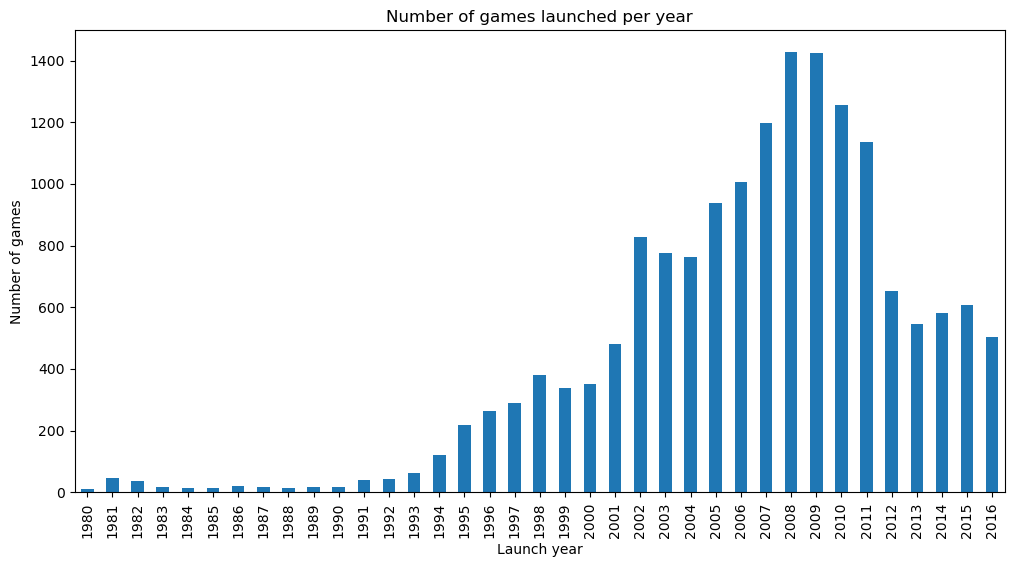

In [10]:
launch_year = data_games.groupby('year_of_release')['platform'].count()
launch_year.plot(kind='bar', figsize=(12, 6))
plt.title('Number of games launched per year')
plt.xlabel('Launch year')
plt.ylabel('Number of games')
plt.show() 


Se aprecia que los primeros juegos de los que este archivo tiene registro data desde los años 1980.

Existe un periodo evidente que va de los años 1980 a 1990, donde tenemos un bajo número de juegos lanzados a la venta, probablemente debido a los dasarrollos técnologicos de la epoca, el costo de producción y el costo de venta al público.

Para el periodo de los años 90's, se ve una alza en el lanzamiento de videojuegos, donde probablemente las mejoras técnologicas de la época, permitieron crear videojuegos de manerá mas 'sencilla', abaratando así el costo de producción y conviertiendo en más atractivos estos juegos con mejor técnología, gráficos y una mejor interfaz para el usuario.

Para el periodo de años 2001 al 2007 se ve una gran incremente de lanzamiento de videojuegos, la era de los videojuegos está en su mayor auge, muy probablemente por una oferta más generalizada de consolas de juego, lo que hace mas 'accesible' al publico el poder juegar más, la oferta de juegos parece ser diversa y el número de lanzamientos de videojuegos supera al de los años anteriores y así sucesivamente alcanzando en el 2008 y 2009 su punto mas alto de lanzamientos. A partir de esta fecha, comienza una caida en la oferta de lanzamientos, pudiendo ser una consecuencia de una alta oferta que diversificaba en gran número a los consumidores, reduciendo así la rentabilidad, lealtad de los jugadores con las diferentes ofertas de videojuegos, consolidación de estudios más profesionalizados que apuestan más a la mejora de la calidad de los videojuegos y la fidelización del cliente, que al lanzamientos de nuevos videojuegos. 

Se verificará el comportamiento de ventas entre una plataforma a otra, con el fin de elegir las que cuenten con mayores ventas totales y se construirá una distribución basada en los datos de cada año.

In [11]:
total_sales_by_platform = data_games.groupby('platform')['total_sales'].sum()
total_sales_by_platform = total_sales_by_platform.sort_values(ascending=False)
display(total_sales_by_platform)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Podemos identificar las principales plataforma 

In [12]:
main_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'XOne', '3DS']

filtered_data = data_games[data_games['platform'].isin(main_platforms)]

pivot_data = pd.pivot_table(filtered_data, 
                           index='year_of_release', 
                           columns='platform',
                           values='total_sales',
                           aggfunc='sum'
                        )
display(pivot_data)

platform,3DS,DS,PS,PS2,PS3,PS4,Wii,X360,XOne
year_of_release,,,,,,,,,
1985,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,35.59,166.43,NaN,NaN,NaN,NaN,NaN


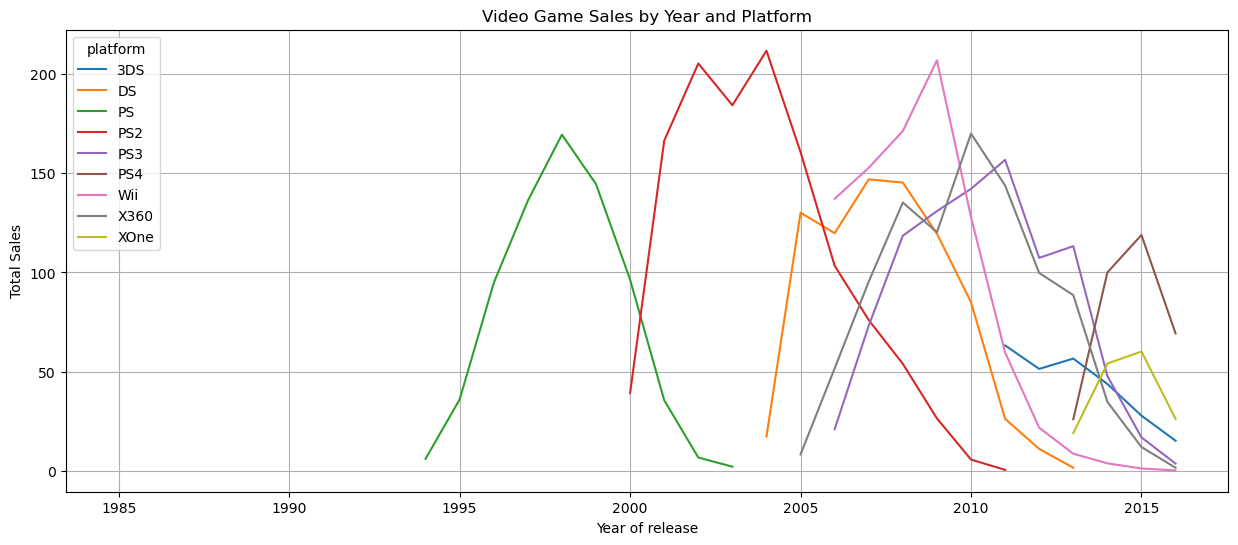

In [13]:
pivot_data.plot(kind='line', figsize=(15, 6))
plt.xlabel('Year of release')
plt.title('Video Game Sales by Year and Platform')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

Podemos obtener diferentes observaciones:
- plataforma PS. Las plataformas PS, PS2 Y PS3, pertenecen a la misma compañia, pero fueron versiones mejoradas que fueron lanzadas al mercado con algunos años de diferencia.
    - siendo PS la primera en ser lanzada en el año 1994 y comenzando su baja de ventas en el 99. Dejando de tener ventas en el 2004
    - PS2, sale al mercado en el año 2000, justo en la mejor época debido a la gran alza de juegos lanzados a la venta. En esta comparativa podemos ver que incluso fue la plataforma que mejores ventas tuvo en este top. Comenzando su descenso en el 2005. Dejando de tener ventas en el 2012
    - PS2, sale al mercado en el año 2006, si bien no le fue mal, no pudo igualar las ventas de su antecesor PS1, no podemos determinar exactamente la razón, pero muy probablemente sea porque en el año después del año 2008 comenzó una baja en el lanzamiento de nuevos juegos. Continuando con sus ventas aún en el 2016
- Plataforma DS: vemos que fue de los precursores, pues hay un registro mínimo de venta en el año 1985, siendo su único año de venta (verificar la veracidad de este dato). Vuelve a salir a la venta 2004 y dejando de vender en el 2014.
- Plataforma Wii: plataforma lanzada en el año 2006, teniendo su mejor año en el 2009, fue una plataforma que llegó con una propuesta innovador, que en poco tiempo fue superada por sus competidores. Las razones no se pueden saber por medio de estos datos, sin embargo, a pesar de ir descendiendo en sus ventas, es una plataforma que aún se mantiene y continua haciendo ventas aun en el 2016.
- Plataforma X360: plataforma que es lanzada en el año 2005, cuyo pico máximo se obtiene en el 2010, ha ido disminuyendo su número de ventas, pero ha sido un descenso 'tranquilo'.

Agregados extras:
Las siguientes plataformas, se agregan después de revisar que aún cuando no son lideres de venta, sí perteneces a 2 grandes empresas lideres en el ramo, y aún continuan con ventas en el 2016:
- Plataforma PS4: introducida al mercado en el 2013, es la sucesora de la PS3, que ofrece diferentes caracteristicas a los jugadores. Parece ser una plataforma bien recibida y a la alza.
- Plataforma XOne:de igual forma intoducida al mercado en el 2013, viene a mejorar las caracteristicas del X360, las ventas totales de esta plataforma no fueron tan altas como la de su competidor.
- Plataforma 3DS: lanzada al mercado como la mejora de la DS, introducida al mercado en el año 2011, no ha tenido las mejores ventas como lo habia logrado su antecesor, con un tendencia a la baja.

In [14]:
first_year = pivot_data.apply(lambda x: x.first_valid_index())
last_year = pivot_data.apply(lambda x: x.last_valid_index())

duration = last_year - first_year

duration_df = pd.DataFrame({'first_sale_year': first_year, 'last_sale_year': last_year, 'duration_years': duration})
duration_df = duration_df.sort_values(by='first_sale_year', ascending=True)
duration_df['year_difference'] = duration_df['first_sale_year'].diff().fillna(0).astype(int)
average_life_expectancy = duration_df['duration_years'][1:].mean()


print(duration_df)
print()
print('El promedio de duración de las plataformas generando ventas es de:' , average_life_expectancy , 'años')


          first_sale_year  last_sale_year  duration_years  year_difference
platform                                                                  
DS                   1985            2013              28                0
PS                   1994            2003               9                9
PS2                  2000            2011              11                6
X360                 2005            2016              11                5
PS3                  2006            2016              10                1
Wii                  2006            2016              10                0
3DS                  2011            2016               5                5
PS4                  2013            2016               3                2
XOne                 2013            2016               3                0

El promedio de duración de las plataformas generando ventas es de: 7.75 años


Al Analizar las plataformas con las principales ventas, podemos determinar que las plataformas más populares son obra de 3 grandes empresas, que son Nintendo, Sony y Microsoft.
Su distribución se muestra a continuación:

Nintendo:
- 3DS: Nintendo 3DS
- DS: Nintendo DS
- GB: Game Boy
- GBA: Game Boy Advance
- GC: GameCube
- N64: Nintendo 64
- NES: Nintendo Entertainment System
- SNES: Super Nintendo Entertainment System
- Wii: Nintendo Wii

Sony:
- PS: PlayStation
- PS2: PlayStation 2
- PS3: PlayStation 3
- PS4: PlayStation 4
- PSP: PlayStation Portable

Microsoft:
- X360: Xbox 360
- XB: Xbox
- XOne: Xbox One

Por lo que por empresa, se revisará cuanto tiempo le toma a cada empresa lanzar una nueva plataforma.

## Información por compañia

### Nintendo

- NES: Nintendo Entertainment System
- GB: Game Boy
- SNES: Super Nintendo Entertainment System
- N64: Nintendo 64
- GBA: Game Boy Advance
- GC: GameCube
- DS: Nintendo DS
- Wii: Nintendo Wii
- 3DS: Nintendo 3DS

In [15]:
nintendo_platforms = ['Wii', 'DS', 'GBA', '3DS', 'GB', 'NES', 'N64', 'SNES', 'GC']

filtered_nintendo_platforms = data_games[data_games['platform'].isin(nintendo_platforms)]

nintendo_platforms_pivot_data = pd.pivot_table(filtered_nintendo_platforms, 
                                               index='year_of_release', 
                                               columns='platform',
                                               values='total_sales',
                                               aggfunc='sum'
                                               )
# display(nintendo_platforms_pivot_data)

In [16]:
nintendo_first_sale_year = nintendo_platforms_pivot_data.apply(lambda x: x.first_valid_index())
nintendo_last_sale_year = nintendo_platforms_pivot_data.apply(lambda x: x.last_valid_index())

platform_nintendo_durations = nintendo_last_sale_year - nintendo_first_sale_year

duration_nintendo = pd.DataFrame({'first_sale_year': nintendo_first_sale_year, 'last_sale_year': nintendo_last_sale_year, 'duration_years': platform_nintendo_durations})
duration_nintendo = duration_nintendo.sort_values(by='first_sale_year', ascending=True)
duration_nintendo['year_difference'] = duration_nintendo['first_sale_year'].diff().fillna(0).astype(int)
nintendo_average_life_expectancy = duration_nintendo['duration_years'][2:].mean()
nintendo_average_launch = duration_nintendo['year_difference'][1:].mean()

print(duration_nintendo)
print()
print('Promedio de años que dura con ventas una plataforma en Nintendo:', nintendo_average_life_expectancy ,'años')
print('Periodo promedio entre cada lanzamiento de plataforma en Nintendo:' , nintendo_average_launch, 'años')

          first_sale_year  last_sale_year  duration_years  year_difference
platform                                                                  
NES                  1983            1994              11                0
DS                   1985            2013              28                2
GB                   1988            2001              13                3
SNES                 1990            1999               9                2
N64                  1996            2002               6                6
GBA                  2000            2007               7                4
GC                   2001            2007               6                1
Wii                  2006            2016              10                5
3DS                  2011            2016               5                5

Promedio de años que dura con ventas una plataforma en Nintendo: 8.0 años
Periodo promedio entre cada lanzamiento de plataforma en Nintendo: 3.5 años


### Sony:

- PS: PlayStation
- PS2: PlayStation 2
- PS3: PlayStation 3
- PS4: PlayStation 4
- PSP: PlayStation Portable

In [17]:
sony_platforms = ['PS', 'PS2', 'PS3', 'PS4', 'PSP']

filtered_sony_platforms = data_games[data_games['platform'].isin(sony_platforms)]

sony_platforms_pivot_data = pd.pivot_table(filtered_sony_platforms, 
                                           index='year_of_release', 
                                           columns='platform',
                                           values='total_sales',
                                           aggfunc='sum'
                                           )
# display(sony_platforms_pivot_data)

In [18]:
sony_first_sale_year = sony_platforms_pivot_data.apply(lambda x: x.first_valid_index())
sony_last_sale_year = sony_platforms_pivot_data.apply(lambda x: x.last_valid_index())

platform_sony_durations = sony_last_sale_year - sony_first_sale_year

duration_sony = pd.DataFrame({'first_sale_year': sony_first_sale_year, 'last_sale_year': sony_last_sale_year, 'duration_years': platform_sony_durations})
duration_sony = duration_sony.sort_values(by='first_sale_year', ascending=True)
duration_sony['year_difference'] = duration_sony['first_sale_year'].diff().fillna(0).astype(int)
sony_average_life_expectancy = duration_sony['duration_years'].mean()
sony_average_launch = duration_sony['year_difference'][1:].mean()

print(duration_sony)
print()
print('Promedio de años que dura con ventas una plataforma en Nintendo:', sony_average_life_expectancy ,'años')
print('Periodo promedio entre cada lanzamiento de plataforma en Nintendo:' , sony_average_launch, 'años')

          first_sale_year  last_sale_year  duration_years  year_difference
platform                                                                  
PS                   1994            2003               9                0
PS2                  2000            2011              11                6
PSP                  2004            2015              11                4
PS3                  2006            2016              10                2
PS4                  2013            2016               3                7

Promedio de años que dura con ventas una plataforma en Nintendo: 8.8 años
Periodo promedio entre cada lanzamiento de plataforma en Nintendo: 4.75 años


### Microsoft:

- X360: Xbox 360
- XB: Xbox
- XOne: Xbox One

In [19]:
microsoft_platforms = ['X360', 'XB', 'XOne']

filtered_microsoft_platforms = data_games[data_games['platform'].isin(microsoft_platforms)]

microsoft_platforms_pivot_data = pd.pivot_table(filtered_microsoft_platforms, 
                                                index='year_of_release', 
                                                columns='platform',
                                                values='total_sales',
                                                aggfunc='sum'
                                                )
# display(microsoft_platforms_pivot_data)

In [20]:
microsoft_first_sale_year = microsoft_platforms_pivot_data.apply(lambda x: x.first_valid_index())
microsoft_last_sale_year = microsoft_platforms_pivot_data.apply(lambda x: x.last_valid_index())

platform_microsoft_durations = microsoft_last_sale_year - microsoft_first_sale_year

duration_microsoft = pd.DataFrame({'first_sale_year': microsoft_first_sale_year, 'last_sale_year': microsoft_last_sale_year, 'duration_years': platform_microsoft_durations})
duration_microsoft = duration_microsoft.sort_values(by='first_sale_year', ascending=True)
duration_microsoft['year_difference'] = duration_microsoft['first_sale_year'].diff().fillna(0).astype(int)
microsoft_average_life_expectancy = duration_microsoft['duration_years'].mean()
microsoft_average_launch = duration_microsoft['year_difference'][1:].mean()

print(duration_microsoft)
print()
print('Promedio de años que dura con ventas una plataforma en Nintendo:', microsoft_average_life_expectancy.round(1) ,'años')
print('Periodo promedio entre cada lanzamiento de plataforma en Nintendo:' , microsoft_average_launch, 'años')

          first_sale_year  last_sale_year  duration_years  year_difference
platform                                                                  
XB                   2000            2008               8                0
X360                 2005            2016              11                5
XOne                 2013            2016               3                8

Promedio de años que dura con ventas una plataforma en Nintendo: 7.3 años
Periodo promedio entre cada lanzamiento de plataforma en Nintendo: 6.5 años


## Conclusión particular

### Nintendo:
- Promedio de años que dura con ventas una plataforma en Nintendo: 8.0 años
- Periodo promedio entre cada lanzamiento de plataforma en Nintendo: 3.5 años
- Plataformas lanzadas: 9
- Ultimo año de lanzamiento: 2011
- Plataformas aun con venta en 2016
  - Plataforma 3DS: con un tendencia a la baja.
  - Plataforma Wii: con un tendencia a la baja.

### Sony:
- Promedio de años que dura con ventas una plataforma en Nintendo: 8.8 años
- Periodo promedio entre cada lanzamiento de plataforma en Nintendo: 4.75 años
- Plataformas lanzadas: 5
- Último año de lanzamiento: 2013
- Plataformas aun con venta en 2016
  - Plataforma PS3: con un tendencia a la baja.
  - Plataforma PS4: Parece ser una plataforma bien recibida y a la alza.

### Microsoft:
- Promedio de años que dura con ventas una plataforma en Nintendo: 7.3 años
- Periodo promedio entre cada lanzamiento de plataforma en Nintendo: 6.5 años
- Plataformas lanzadas:3
- Último año de lanzamiento: 2013
- Plataformas aun con venta en 2016
  - Plataforma X360: con un tendencia a la baja.
  - Plataforma XOne: con tendencia a la alza

Para la elaboración de un modelo predictivo del 2017, podríamos considerar tomar una ventana de analisis de datos historicos del 2008 al 2015, esto, porque 2008 y 2009 fueron los años con mayor numero de ventas, al mismo tiempo que los datos del 2016 no parece ser certeros. Habia considerado tomar a partir del 2011, que nos indica la fecha del ultimo lanzamiento de Nintendo y el promedio de 8 años de vidas de las plataformas, sin embargo tomar los años de mayores ventas podría dar una visión mas completa sobre el posible escenario para el 2017. Consideraria las plataformas PS3, PS4, X360, XOne, 3DS y Wii, dado que fueron de las plataformas con mejores ventas, y mas populares, incluyendo 2 de cada compañia. 

## Boxplot

Se revisan las ventas globales de todos los juegos desglosados por plataformas en el sigueinte boxplot, en ventas generales de todos los años registrados.

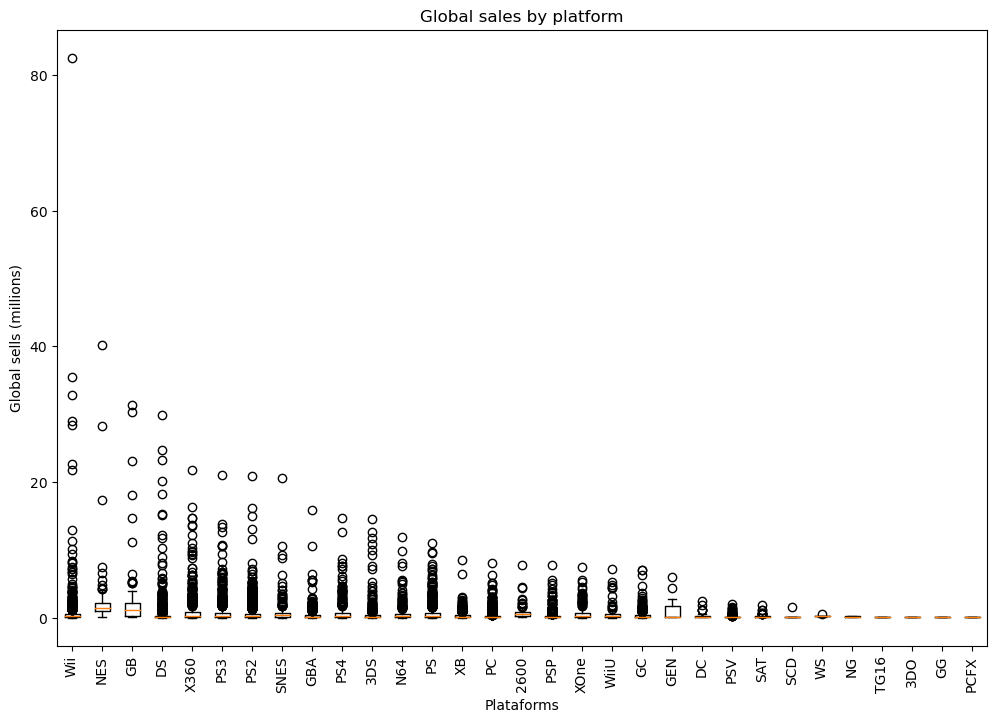

In [21]:
sales_by_platform = []
plataforms = data_games['platform'].unique()

for platform in plataforms:
    ventas = data_games['total_sales'][data_games['platform'] == platform]
    sales_by_platform.append(ventas)

plt.figure(figsize=(12, 8))
plt.boxplot(sales_by_platform, labels=plataforms)
plt.xlabel('Plataforms')
plt.ylabel('Global sells (millions)')
plt.title('Global sales by platform')
plt.xticks(rotation=90)
plt.show()


En el boxplot tenemos representados cada una de las plataformas, vemos que es complicado tener una buena visualización de los datos arrojados por el box, sin embargo podemos ver bien la representación de los datos atípicos de cada una de las plataformas, siendo el más representativo de la plataforma Wii, que sobrepasa los 80 millones en ventas totales. El siguiente dato dato atípico más alto pertenece a la plataforma NES, que logra sobrepasar por poco los 40 millones. Esto nos deja ver que alguno de los juegos de wii, tuvo un éxito de ventas sin presedentes.

Para poder ver bien los datos de media, realizaremos otro tipo de representación únicamente de estos datos.
Por otra parte, se proporciona una tabla con los datos de cada una de las plataformas con su media global de ventas 

In [22]:
median_per_platform = [np.percentile(sells, 50) for sells in sales_by_platform]
q1_p = [np.percentile(sells, 25) for sells in sales_by_platform]
q3_p = [np.percentile(sells, 75) for sells in sales_by_platform]

rest_q3_q1 = [q3 - q1 for q1, q3 in zip(q1_p, q3_p)]
max_outlier_per_platform = [q3 + 1.5 * rest for q3, rest in zip(q3_p, rest_q3_q1)]

max_value_per_platform = [np.max(sells) for sells in sales_by_platform]

data_results = pd.DataFrame({'plataform': plataforms, 'median_global_sell': median_per_platform, 'max_outlier': max_outlier_per_platform, 'max_value': max_value_per_platform,})

display(data_results)

,plataform,median_global_sell,max_outlier,max_value
0,Wii,0.190,1.08625,82.54
1,NES,1.375,4.05625,40.24
2,GB,1.165,4.95875,31.38
3,DS,0.110,0.60000,29.80
4,X360,0.280,1.72875,21.82
5,PS3,0.270,1.71000,21.05
6,PS2,0.230,1.28000,20.81
7,SNES,0.320,1.56000,20.62
8,GBA,0.160,0.89625,15.84
9,PS4,0.200,1.73500,14.63


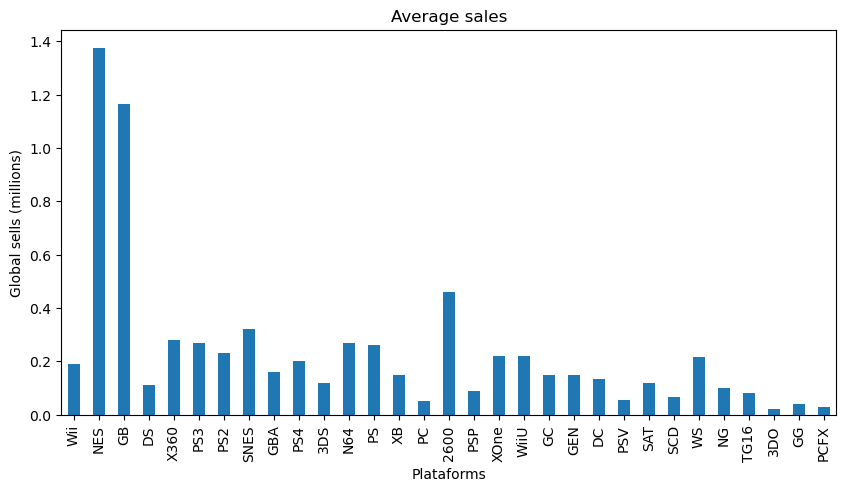

In [23]:
median_sell = data_results[['plataform', 'median_global_sell']]
median_sell.plot(kind='bar',
                x='plataform',
                figsize=(10, 5),
                title='Average sales',
                xlabel='Plataforms',
                ylabel='Global sells (millions)',
                legend=False)

plt.show()

Al tener graficadas las ventas promedios de todos los registros que tenemos en nuestro dataset, podemos ver que las ventas promedios más grandes pertenecen a las plataformas de NES y GB, que pertenecen a Nintendo, de ahí podemos ver que se distribuye de una manera un poco más 'uniforme'. Sin embargo será mejor que podamos revisar los datos que anteriormente habiamos espeficicado, que sería del año 2008 al 2015

In [24]:
dates = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
data_selected = data_games[data_games['year_of_release'].isin(dates)]

# display(data_selected)

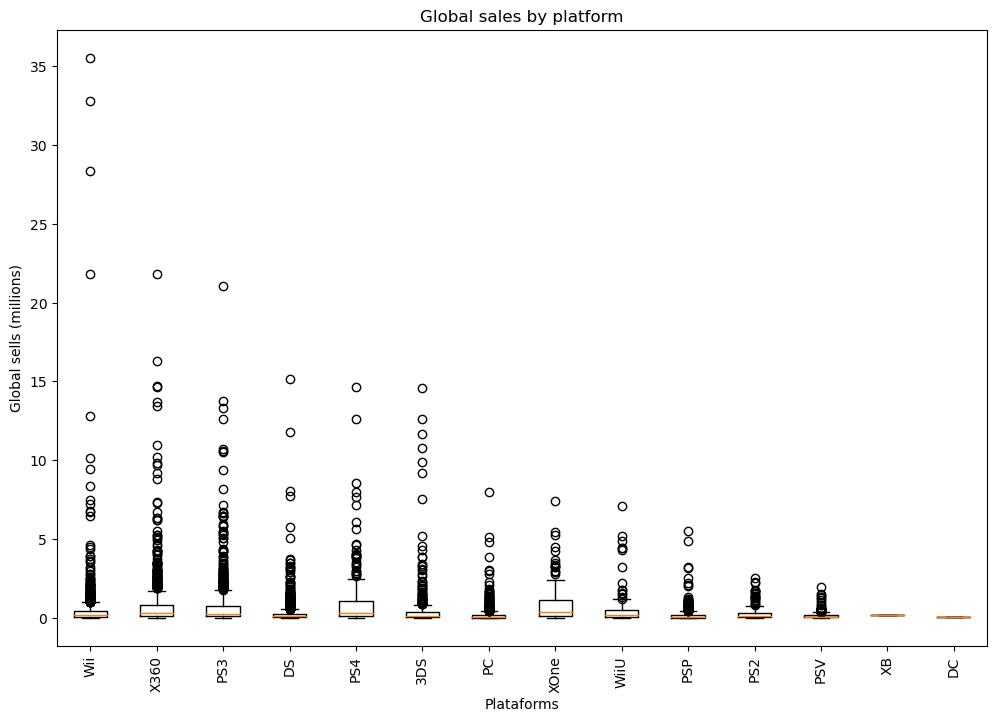

In [25]:
sales_by_platform_2 = []
plataforms_2 = data_selected['platform'].unique()

for platform in plataforms_2:
    sells = data_selected['total_sales'][data_selected['platform'] == platform]
    sales_by_platform_2.append(sells)

plt.figure(figsize=(12, 8))
plt.boxplot(sales_by_platform_2, labels=plataforms_2)
plt.xlabel('Plataforms')
plt.ylabel('Global sells (millions)')
plt.title('Global sales by platform')
plt.xticks(rotation=90)
plt.show()

Ahora con datos seleccionados con base a los años 2008 al 2015, podemos observar una selección de plataformas más actual, donde Wii mantiene los valores atípicos más altos, seguido en este caso por X360 y PS3.
Pese a tener datos más seleccionados, no permite ver muy bien los datos exactos proporcionado por los cuartiles del boxplot, de igualforma voy a representar el promedio de ventas en una gráfica de barras.

In [26]:
median_per_platform_2 = [np.percentile(sells_2, 50) for sells_2 in sales_by_platform_2]

median_sell_2 = pd.DataFrame({'platforms': plataforms_2, 'media':median_per_platform_2})

# display(median_sell_2)

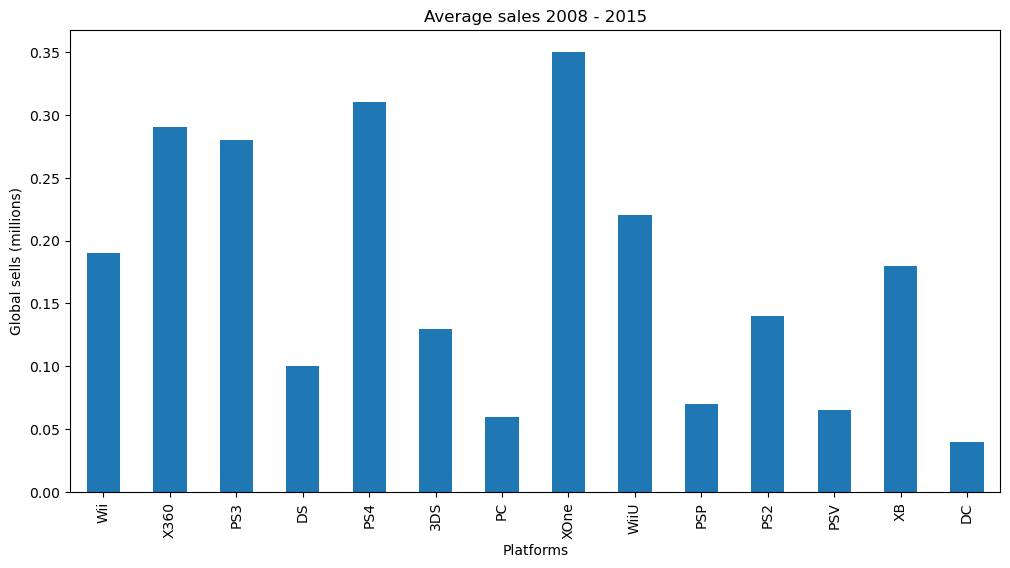

In [27]:
median_sell_2.plot(kind='bar',
                    x= 'platforms',
                    figsize=(12,6),
                    title='Average sales 2008 - 2015',
                    xlabel= 'Platforms',
                    ylabel= 'Global sells (millions)',
                    legend=False,
                    )

plt.show()

Con esta respresentación, se tiene una mejor perspectiva sobre las ventas globales promedio por plataforma dentro del periodo seleccionado del 2008 al 2015.
Podemos observar que el promedio más elevado de ventas se lo lleva la plataforma XOne, seguido del PS4, X360 y PS3. Plataformas que aun el 2016 reportaron ventas activas. Sin embargo, vemos que dentro de las principales plataformas con los promedio de ventas más altos, no sobresalen las plataformas de la compañia de Nintendo.

### PS4

Vamos a revisar las críticas de usuarios, profesionales y como afectan estas las ventas de la plataforma PS4. 
Se creará un gráfico de displersión para calcular la correlación entre las reseñas y las ventas.

Para hacer un mejor análisis, se crea una columna llamada critic_score_base_10 para poder tener esta columna en una base identica a la de user_score.
Se toman en cuenta los datos de las fechas anteriormente elegidas, del 2008 al 2015.


In [28]:

data_games['critic_score_base_10'] = data_games['critic_score'] / 10
data_selected_ps4 = data_games[data_games['platform'] == 'PS4']

display(data_selected_ps4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_score_base_10
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,9.7
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,8.2
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98,NaN
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,NaN,0.01,6.9
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01,6.1
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01,5.1


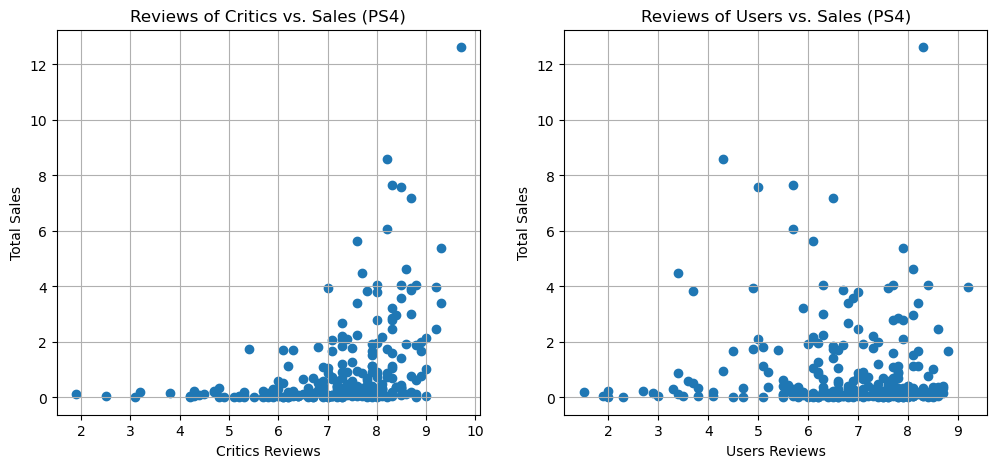

Correlación entre reseñas de críticos y ventas: 0.41
Correlación entre reseñas de usuarios y ventas: -0.03


In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data_selected_ps4['critic_score_base_10'], data_selected_ps4['total_sales'])
plt.title('Reviews of Critics vs. Sales (PS4)')
plt.xlabel('Critics Reviews')
plt.ylabel('Total Sales')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(data_selected_ps4['user_score'], data_selected_ps4['total_sales'])
plt.title('Reviews of Users vs. Sales (PS4)')
plt.xlabel('Users Reviews')
plt.ylabel('Total Sales')
plt.grid(True)

plt.show()

correlation_critic = data_selected_ps4['critic_score_base_10'].corr(data_selected_ps4['total_sales'])
correlation_user = data_selected_ps4['user_score'].corr(data_selected_ps4['total_sales'])
print(f"Correlación entre reseñas de críticos y ventas: {correlation_critic:.2f}")
print(f"Correlación entre reseñas de usuarios y ventas: {correlation_user:.2f}")

Podemos observar que a medida que las reseñas de críticos tienden a aumentar (a ser de puntuaciones más altas), las ventas tienden a aumentar también, lo que sugiere que las buenas reseñas de críticos están relacionadas con mayores ventas.  

Para la correlacion entre reseñas de usuarios y ventas vemos que no hay una relación clara o fuerte entre las reseñas de usuarios y las ventas. Las reseñas de usuarios no parecen influir significativamente en las ventas de los videojuegos.

Podemos inferir que las reseñas de críticos tienen mucho más peso a la hora de influir las ventas de los videojuegos, contrario a las calificaciones de los usuarios. No podemos determinar la razón exacta, pero podríamos sospechar que las reseñas de los críticos tienes más peso y difución para el público, por lo que tiene más peso en su desición de compra. 

De igual manera podriamos obtener la correlación de las ventas y las críticas en general en la siguiente tabla:

In [30]:
columns_of_interest = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score_base_10', 'user_score', 'total_sales']
ps4_data = data_selected_ps4[columns_of_interest]

display(ps4_data.corr())

,na_sales,eu_sales,jp_sales,other_sales,critic_score_base_10,user_score,total_sales
na_sales,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score_base_10,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


Con base a lo anterior, revisaremos las ventas que tuvieron los mismos juegos que se vendieron en PS4 pero para otras plataformas.

In [31]:
selected_games = data_selected_ps4['name'].unique()
platforms_selected_games = data_games[data_games['name'].isin(selected_games)]

# display(platforms_selected_games)

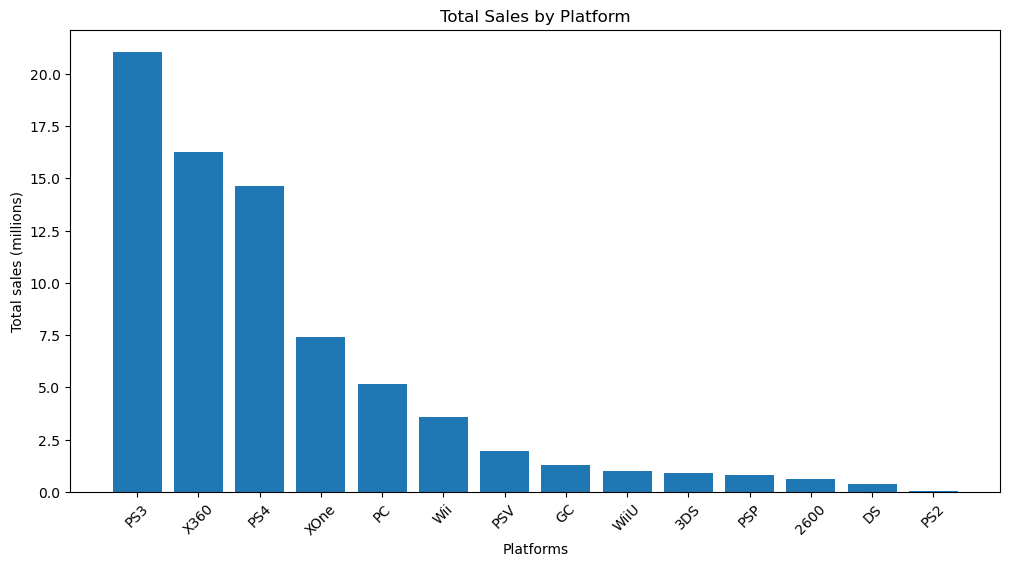

In [32]:
plt.figure(figsize=(12, 6))
plt.bar(platforms_selected_games['platform'], platforms_selected_games['total_sales'])
plt.xlabel('Platforms')
plt.ylabel('Total sales (millions)')
plt.title('Total Sales by Platform')
plt.xticks(rotation=45)

plt.show()

En el gráfico se observa que, considerando los mismos juegos que fueron analizados en PS4, el volumen de ventas para las diferentes plataformas es considerablemente diferente. Esto quiere decir que los mismos juegos se vendieron más en PS3 que en PS2, o que que X360 vendió más que XOne. Las diferencias de ventas podría estar influenciado por el tiempo, debido a que en el rango de tiempo considerado, una plataforma podría estar por salir de circulación, o bien que requerimiento de los juegos más modernos, ya no pueden ser ejecutados por el hardware de la plataforma más antigua y por ello, tener menor ventas. De igual manera es importante recordar que no todos los juegos se vendian para todas las plataformas, lo que también podría ser una diferencia a la hora de ver la venta total por plataforma.

Para ver como se comportan algunos juego revisaremos 2 de los más populares en PS4, cuyos datos son:

| Game | User Score | Critic Score base 10 |
| --- | --- | --- |
| Grand Theft Auto V | 8.3 | 9.7 |
| Call of Duty: Advanced Warfare | 5.7 | 8.3 |





In [33]:
gta_v = platforms_selected_games[platforms_selected_games['name'] == 'Grand Theft Auto V']
cod_aw = platforms_selected_games[platforms_selected_games['name'] == 'Call of Duty: Advanced Warfare']
# display(gta_v)
# display(cod_aw)

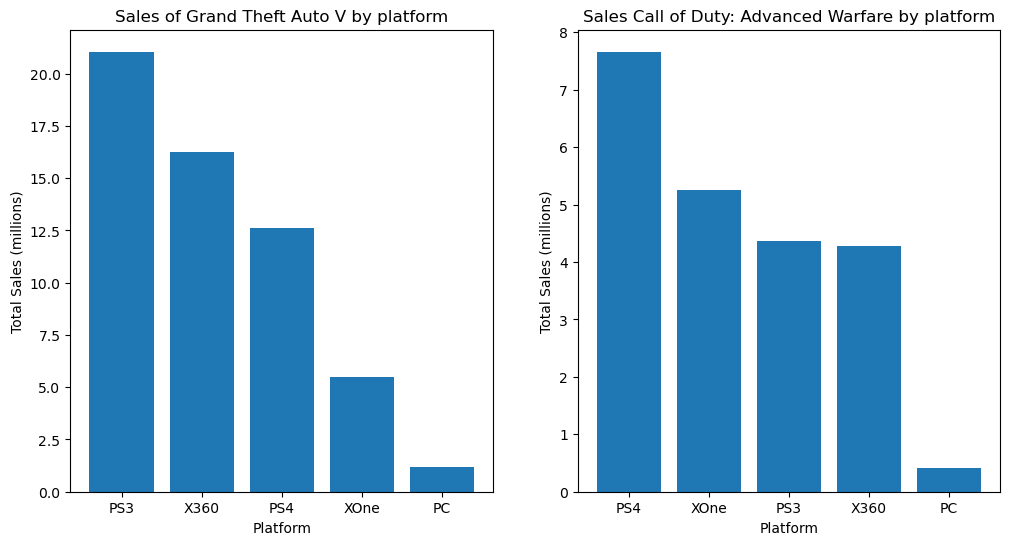

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(gta_v['platform'], gta_v['total_sales'])
plt.title('Sales of Grand Theft Auto V by platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')

plt.subplot(1, 2, 2)  
plt.bar(cod_aw['platform'], cod_aw['total_sales'])
plt.title('Sales Call of Duty: Advanced Warfare by platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')


plt.show()

Al analizar las ventas del mismo juego para las diferentes plataformas podemos ver lo siguiente:
- Grand Theft Auto V: Vemos que la mayores ventas están registadas para PS3 seguido de X360. Posteriormente PS4 y XOne, lo que hace pensar sobre el año de lanzamiento de este juego. Su año de lanzamiento fue en el 2013, año donde efectivamente las plataformas PS3 y X360 ya era plataformas consolidadas y PS4 y XOne serían lanzadas en el año 2014, un año después del lanzamiento del propio juego. Las ventas para PC no son tan altas como lo son para consolas portables.
- Call of Duty: Advanced Warfare: Para este juego vemos lo contrario, ventas más altas para PS4 y XOne y más bajas para PS3 y X360. Este juego fue lanzado a finales del año 2014, año de lanzamiento de las plataformas PS4 y XOne, las plataformas PS3 y X360 ya van de salida, y se podría revisar si en el lanzamiento de las plataformas del 2014, venia incluido este juego como una 'promoción' y si esto fue considerado para el número de ventas.

Para ambos juegos, vemos que no tuvieron ventas para plataformas en Nintendo, unicamente para Microsoft y para Sony.

Se revisa la distribución general de los juegos por género. 
Para ello se revisarán las ventas generales de toda la informacion que nos proporciona nuestro dataframe y también el que hemos filtrado por el periodo de años previamente estudiado (2008-2015).

In [35]:
genre_sales = data_games.groupby('genre')['total_sales'].sum()
genre_sales = genre_sales.sort_values(ascending=False)

genre_sales_period = data_selected.groupby('genre')['total_sales'].sum()
genre_sales_period = genre_sales_period.sort_values(ascending=False)

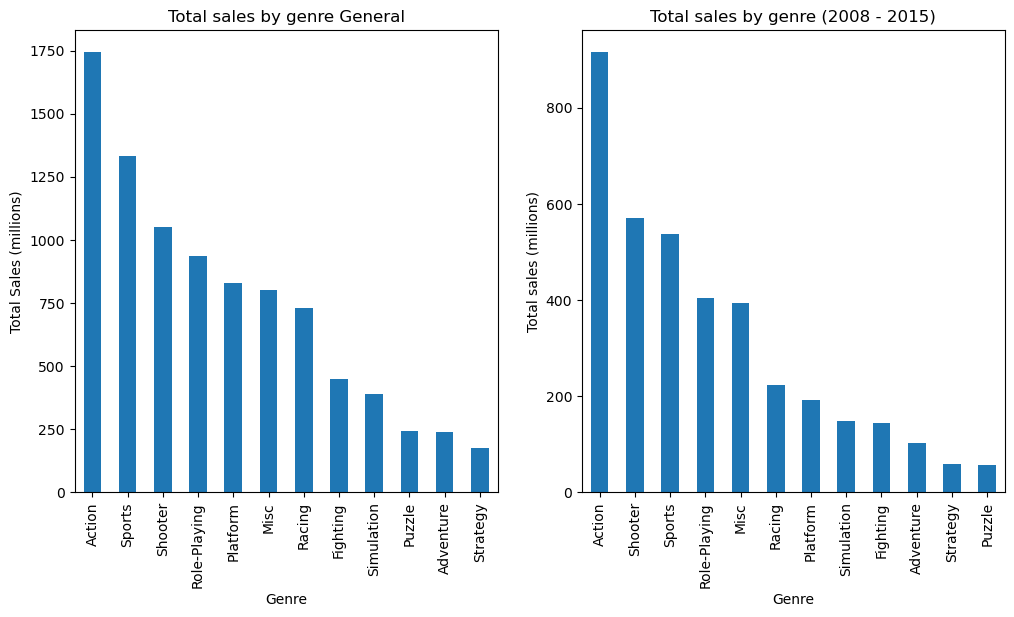

In [36]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
genre_sales.plot(kind='bar')
plt.title('Total sales by genre General')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=90)


plt.subplot(1, 2, 2)
genre_sales_period.plot(kind='bar')
plt.title('Total sales by genre (2008 - 2015)')
plt.xlabel('Genre')
plt.ylabel('Total sales (millions)')
plt.xticks(rotation=90)

plt.show()



Se observa que tanto en el los datos generales como en los datos filtrados por fecha (2008 - 2015) el rey de las ventas es el genero de acción.
Posteriormente se observa que yendo más hacia lo actual, los videojuegos del genero shooter han superado en ventas a los videojuegos de deportes. 
Podemos considerar dentrop del Top 4 en ambos gráficos a los siguientes generos:
- Action
- Shooter
- Sports
- Role Playing

Se observa que estos generos no se despegan de los primeros lugares. Valdría la pena, saber el genero de los principales consumidores de videojuegos, puesto que esto podría darnos más detalles sobre cómo manejar la publicidad que se quiere realizar por parte de la tienda.

Después del top 4, vemos que el orden de los generos varia, subiendo en ventas el genero de Miscelaneos, Racing, simulation, Adventure y fighting, bajando Platform, strategy y puzzle.

Se podría suponer de los generos que están en los últimos lugares, que son menos populares debido a que el usuario podría 'detener' su avence si es que no logra 'pasar' el nivel en el que se encuentra. Lo que podría general frustación. Contrario a los que vemos en los primeros lugares que son más 'abiertos' a las posibilidades. 

# Perfil de usuario por región

Se creará un perfil de usuario por región (NA, UE, JP):
- NA = Norteamérica
- UE = Europa
- JP = Japón
  
Se averiguará cuales son las principales 5 plataformas por región a su vez, se averiguará cuáles son los principales 5 generos por región.

### Pricipales 5 plataformas por región
Para considerar en la notación:
- NA = Norteamérica
- UE = Europa
- JP = Japón

<Figure size 1200x600 with 0 Axes>

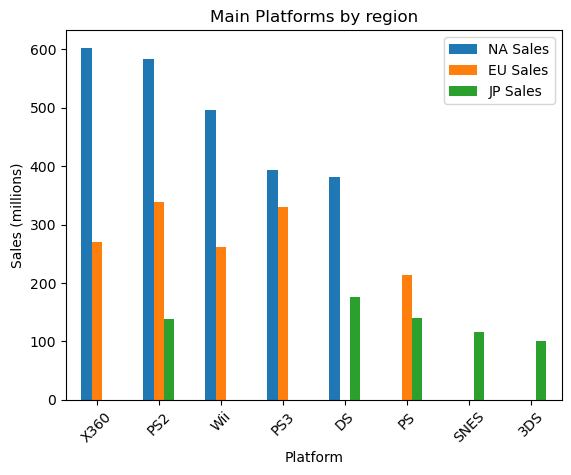

In [37]:
main_platform_na = data_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
main_platform_ue = data_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
main_platform_jp = data_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

top_platforms = pd.concat([main_platform_na, main_platform_ue, main_platform_jp], axis=1)
top_platforms.columns = ['NA Sales', 'EU Sales', 'JP Sales']

plt.figure(figsize=(12,6))
top_platforms.plot(kind='bar')
plt.title('Main Platforms by region')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)

plt.show()

Una vez obtenido las principales plataformas por región, podemos observar que las principales ventas se lleva a cabo en la región de Norte América, seguido por Europa y al finalizar por Japón.

Esto podría sustentarse que las ventas de japón representan las ventas de un solo país, mientras que Europa y Norte América podrían abarcar más paises y por lo tanto más venta.

- Para la región de NA, vemos una preferencia hacia X360, pero seguida muy de cerca del PS2. La precencia de Wii en la región tuvo una buena acogida.
- Para la región de EU, hay una clara preferencia por las plataformas de PlayStation(PS), tanto en su versión 1, 2, y 3, seguidos por X360 y Wii.
- Para Japón, vemos un comportamiento particular, puesto que vemos en los primeros lugares plataformas de Sony y Nintendo, pero no de Microsoft, esto podría ser influenciado por que el mercado japones es un mercado más nacionalista, que suele preferir consumir lo 'local', y al ser Sony y Nintendo, compañias japonesas y Microsoft una compañia estadounidense, dan preferencia a las plataformas de empresas japonesas. Dentro de esto, las plataformas DS, PS2 y PS están a la cabeza, muy seguidas por las plataformas SNES y 3DS.

### Pricipales 5 generos por región
Para considerar en la notación:
- NA = Norteamérica
- UE = Europa
- JP = Japón

<Figure size 1200x600 with 0 Axes>

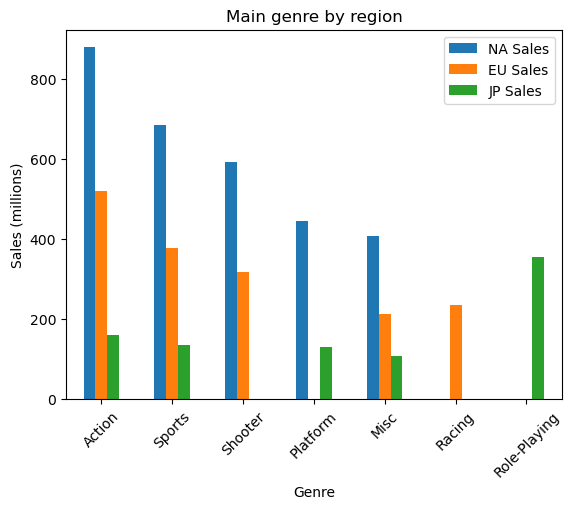

In [38]:
main_genre_na = data_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
main_genre_ue = data_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
main_genre_jp = data_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

top_genre = pd.concat([main_genre_na, main_genre_ue, main_genre_jp], axis=1)
top_genre.columns = ['NA Sales', 'EU Sales', 'JP Sales']

plt.figure(figsize=(12,6))
top_genre.plot(kind='bar')
plt.title('Main genre by region')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)

plt.show()

Con base al gráfico que representa los generos más vendidos en cada región, podemos ver lo siguiente:
- El género preferido en la region de NA y EU es el genero de acción,seguido de los deportes y los juegos de Shooter.
- Po otro lado, el género preferido para la región de japón son los juegos de Role-Playing, que cabe resaltar, se posiciona como favorito con una diferencia significativa del resto de géneros. Puesto que generos de acción, deportes y platform, se encuentrar en un nivel de ventas similar, dejando al final al genero miscelaneo.
- El género racing es más popular unicamente en la región de EU
- El género de  miscelaneos se posiciona con el lugar 5 para las 3 regiones.
- El genero platform es bien recibido en NA y japón, pero no es de mucho interés para la región de EU

## Clasificación ESRB

Como notación el ESRB (Entertainment Software Rating Board) se encarga de clasificar el contenido de videojuegos y aplicacione con el fin de recomendar la edad y la madurez recomendadas que los jugadores deben tener para saber si es apto o no para la utilización del juego y/o aplicación. 

- E (Everyone): Apto para todos
- E10+ (Everyone 10 and Older): Apto para mayores de 10 años
- EC (Early Childhood): Apto para niños pequeños
- K-A (Kids to Adults)
- T (Teen): Adolescentes
- M (Mature): Para adultos
- AO (Adults Only): Solo para adultos
- RP (Rating Pending): Clasificación pendiente

Para saber si las clasificaciones de ESRB afecta a las ventas por regiones individuales, se realizará un gráfico de barras que nos ayude a verificar esto.

<Figure size 1200x600 with 0 Axes>

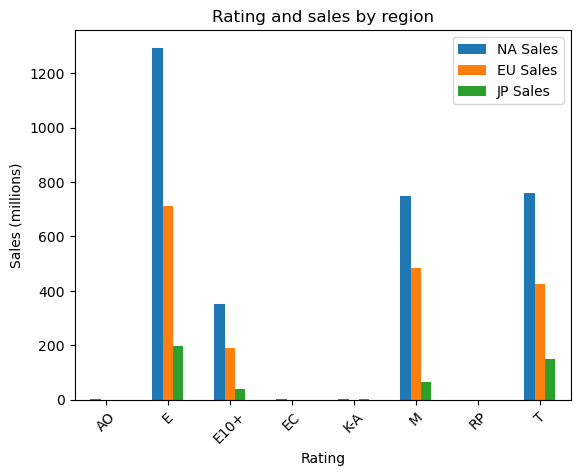

In [39]:
rating_na = data_games.groupby('rating')['na_sales'].sum()
rating_ue = data_games.groupby('rating')['eu_sales'].sum()
rating_jp = data_games.groupby('rating')['jp_sales'].sum()

rating_by_region = pd.concat([rating_na, rating_ue, rating_jp], axis=1)
rating_by_region.columns = ['NA Sales', 'EU Sales', 'JP Sales']

plt.figure(figsize=(12,6))
rating_by_region.plot(kind='bar')
plt.title('Rating and sales by region')
plt.xlabel('Rating')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)

plt.show()

Recordemos la nomenclatura del raiting:

- E (Everyone): Apto para todos
- E10+ (Everyone 10 and Older): Apto para mayores de 10 años
- EC (Early Childhood): Apto para niños pequeños
- K-A (Kids to Adults)
- T (Teen): Adolescentes
- M (Mature): Para adultos
- AO (Adults Only): Solo para adultos
- RP (Rating Pending): Clasificación pendiente

Podemos observar que la clasificación de ESRB con mayor ventas en las 3 regiones es la 'E' apta para todos. Lo que nos indica la preferencia por la compra de videojuegos que toda la familia pueda disfrutar.
En segundo lugar tenemos la clasificación 'T', en la región de NA y JP. Mientras que para EU es la clasificación 'M'. Esto nos podría indicar que en la región de europa tenemos compradores más maduros y en NA y JP, los juegos para Adolecentes son más elegidos.
En tercer lugar vemos que lo anterior cambia de posición, pues en tercer lugar para NA y JP son los videojuegos clasificados 'M' y para Europa sería los clasificación 'T'
En cuarto lugar de las ventas más representativas por clasificacion ESRB sería 'E10+' que son juegos aptos para mayores de 10 años.

Con ventas significativamente más bajas encontramos las clasificaciones de:
- AO (Adults Only): Solo para adultos
- EC (Early Childhood): Apto para niños pequeños
- K-A (Kids to Adults)
- RP (Rating Pending): Clasificación pendiente

Por lo que vemos que la venta de videojuegos para el disfrute de toda la familia es la más popular, seguida por un segmento pensado más en un sector especifico que pueden ser los adolecentes o adultos. Finalmente la categoria de niños mayore de 10 años, sería una opción que logra colarse dentro de lo más popular. 

Sinedo menos demandados los juegos para solo adultos y aptos para niños pequeños, podríamos decir que los extremos de la clasificación. 


# Prueba de hipótesis

Para revisar si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas y si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes, verificaremos esto por medio de una prueba de hipótesis.

Para tener una buena evaluación de T-test, se hace previamente una prueba de igualdad de varianzas utilizando la prueba de Levene. 

Se declarará el nivel de significancia (alfa) con un valor del 0.05 considerando que el nivel de exactitud es suficiente para este estudio. 

### Hipótesis de plataformas

Hipótesis nula: No hay diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC.

Hipótesis alternativa: Existe una diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC.

In [40]:
data_xone = data_games[data_games['platform'] == 'XOne']['user_score']
data_pc = data_games[data_games['platform'] == 'PC']['user_score']

levene_test = st.levene(data_xone, data_pc)

alpha = 0.05

if (levene_test.pvalue < alpha):
    print("Rechazamos la hipótesis nula: las varianzas de las calificaciones promedio de los usuarios para ambas plataformas son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: las varianzas de las calificaciones promedio de los usuarios para ambas plataformas no son significativamente diferentes.")
print()

results = st.ttest_ind(data_xone, data_pc, equal_var=True)

if (results.pvalue < alpha):
    print("Se acepta la hipótesis nula: No hay diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC.")
else:
    print("Se rechaza la hipótesis nula: hay evidencia suficiente para concluir que existe una diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC")

No podemos rechazar la hipótesis nula: las varianzas de las calificaciones promedio de los usuarios para ambas plataformas no son significativamente diferentes.

Se rechaza la hipótesis nula: hay evidencia suficiente para concluir que existe una diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC


### Hipótesis de géneros

Hipótesis nula: No hay diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes

Hipótesis alternativa: Existe una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes

In [41]:
data_action = data_games[data_games['genre'] == 'Action']['user_score']
data_sports = data_games[data_games['genre'] == 'Sports']['user_score']

levene_test_genre = st.levene(data_action, data_sports)

alpha_genre = 0.05

if (levene_test_genre.pvalue < alpha_genre):
    print("Rechazamos la hipótesis nula: las varianzas de las calificaciones promedio de los usuarios para ambos géneros son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: las varianzas de las calificaciones promedio de los usuarios para ambos géneros no son significativamente diferentes.")
print()

results_genre = st.ttest_ind(data_action, data_sports, equal_var=True)

if (results_genre.pvalue < alpha_genre):
    print("Se acepta la hipótesis nula: No hay diferencia significativa entre las calificaciones promedio de los usuarios para los géneros acción y deportes.")
else:
    print("Se rechaza la hipótesis nula: hay evidencia suficiente para concluir  que existe una diferencia significativa entre las calificaciones promedio de los géneros acción y deportes.")

No podemos rechazar la hipótesis nula: las varianzas de las calificaciones promedio de los usuarios para ambos géneros no son significativamente diferentes.

Se rechaza la hipótesis nula: hay evidencia suficiente para concluir  que existe una diferencia significativa entre las calificaciones promedio de los géneros acción y deportes.


## Concluciones generales

A continuación, se proporciona una conclusión general del presente proyecto:

*Carga de datos*
Se recibe un dataset que contiene los datos de las reseñas de usuarios y expertos, los géneros, las plataformas y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Los datos presentan un origen de la fecha 1980 al 2016(A tomar que es posible que los datos de 2016 estén incompletos).
Sabiendo esto, cargamos el dataset alojado en un archivo CSV.

*Modificación de datos*
Se comienza el procesamiento de los datos, con la identificación de las columnas que tienen datos nulos, qué tipo de datos se tienen y el nombre de cada columna del dataset. 
No se encuentran como tales datos duplicados.
Se revisa que tipo de datos únicos tiene cada una de las columnas para considera qué hacer con los datos nulos y se toma la decisión de no sustituir ningún dato nulo, con su respectiva justificación.
Se realizan las trasformaciones pertinentes de las columnas que así lo requirieron y se justifica el porqué. 

*Análisis exploratorio*
Comenzamos el exploratorio revisando cuantos videojuegos fueron lanzado cada año, se verifican las ventas históricas por plataforma y conocer la popularidad de estas, cada cuando sale una nueva plataforma y cuanto tarda en desaparecer. 
Se determina que la gran mayoría de las plataformas que se analizan pertenecen a 3 grandes empresas: Nintendo, Sony y Microsoft. Con esta información, y para tener datos más concisos, se analiza el promedio de tiempo que le toma a cada compañía sacar una nueva plataforma y cuanto tiempo en promedio dura esta plataforma en venta, concluyendo que el mejor periodo para un modelo predictivo para el 2017, tomaría datos de los años 2008 al 2015.
Se realiza un análisis con boxplot para identificar el comportamiento de las ventas para las diferentes plataformas, identificación de datos atípicos y ventas promedio. Esto se realiza de forma general al dataset y con los datos especifico del periodo anteriormente determinado. 
Se elige una de las plataformas para analizar la influencia de las críticas de los usuarios y profesionales en las ventas de la misma. En este caso, se elige PS4.Con ayuda de un gráfico de dispersión y el calculo de la correlación se sugieren ciertas conclusiones. Con base a lo anterior se revisan las ventas que tuvieron los mismos juegos que se vendieron en PS4, pero en otras plataformas. Posteriormente se analiza el comportamiento de 2 de los juegos mas populares en PS4 y sus ventas en otras plataformas.
Se revisan las ventas por género, tanto para todos los años que hay en el dataset como en particular en el periodo elegido y se saca conclusiones de lo observado.
También se realiza un perfil de usuario por región, recordando que tenemos la región de Norteamérica, Europa y Japón, revisando el comportamiento de las 5 plataformas principales y los 5 principales géneros. 
Se analiza si la clasificación ESRB afecta a las ventas región.

*Generación y comprobación de hipótesis* 
Se generan 2 pruebas de hipótesis, en las cuales, se pudo verificar que existe una diferencia significativa entre las calificaciones promedio de los usuarios para las plataformas Xbox One y PC. Y que hay evidencia suficiente para concluir que existe una diferencia significativa entre las calificaciones promedio de los géneros acción y deportes.

Se ha proporcionado información y sugerencias suficientes para que la tienda ‘ICE’ pueda tomar decisiones de acción sobre inversión en proyectos prometedores y cómo poder planificar mejor sus campañas publicitarias. 
